# Ejercicio presentado por:

Alexandra Pinzon  Código: 201728019

Ricardo Blanco      Código: 201727686

# Exercise 7

Data Preparation

We will train our network on the **CIFAR10** [dataset](https://www.cs.toronto.edu/~kriz/cifar.html), which contains `50,000` 32x32 color training images, labeled over 10 categories, and 10,000 test images. 

As this dataset is also included in Keras datasets, we just ask the `keras.datasets` module for the dataset.

Training and test images are normalized to lie in the $\left[0,1\right]$ interval.

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


In [0]:
# Normal option with full database
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()  # File is 160MB

In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

gpg: keybox '/tmp/tmp6zld4m5n/pubring.gpg' created
gpg: /tmp/tmp6zld4m5n/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [0]:
from google.colab import auth
auth.authenticate_user()

In [5]:
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

··········


In [6]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [7]:
print('cifar-10-python_trainingbatch1_test.tar.gz:')
!ls drive/cifar-10-python_trainingbatch1_test.tar.gz

cifar-10-python_trainingbatch1_test.tar.gz:
drive/cifar-10-python_trainingbatch1_test.tar.gz


In [0]:
# Only the first training batch and testing  # File is 58MB
import tarfile
from six.moves import cPickle

# Use local copy of the cifar-10 database
data_tar = tarfile.open('drive/cifar-10-python_trainingbatch1_test.tar.gz')

def extract_xy(member, data_tar):
    d = cPickle.load(data_tar.extractfile(member), encoding='bytes')
    d_decoded = {}
    for k, v in d.items():
        d_decoded[k.decode('utf8')] = v
    d = d_decoded
    X = d['data']
    X = X.reshape(X.shape[0], 3, 32, 32)
    y = d['labels']
    return X.transpose(0, 2, 3, 1), np.reshape(y, (len(y), 1))

X_train, y_train = extract_xy('cifar-10-batches-py/data_batch_1', data_tar)
X_test, y_test = extract_xy('cifar-10-batches-py/test_batch', data_tar)


In [9]:
X_train.shape, X_test.shape

((10000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
nb_classes = y_train.max() + 1
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [0]:
labels = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [12]:
X_train[0].shape

(32, 32, 3)

In [13]:
y_train[0]

array([6])

In [14]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

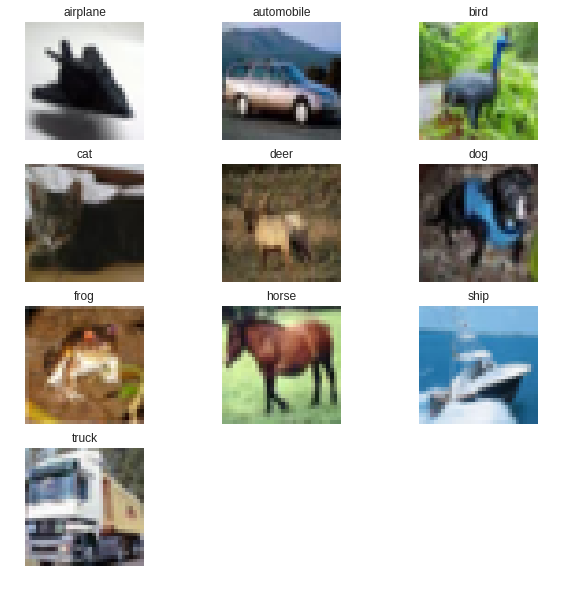

In [15]:
# Select one image per y
images = [np.nonzero(Y_train[:,i] == 1)[0][0] for i in range(nb_classes)]

# Plot all images
fig, ax = plt.subplots(4,3, figsize=(10,10))
ax = ax.reshape(12)
for i in range(nb_classes):
    ax[i].imshow(X_train[images[i]])
    ax[i].set_title(labels[y_train[images[i]][0]])
    ax[i].axis('off')

ax[-1].axis('off')
ax[-2].axis('off')
plt.show()

# Exercise 08.1

Train a Softmax regression using keras
Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 31% with 50 epochs)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

In [0]:
model = Sequential()

model.add(Flatten(input_shape= (32, 32, 3)))
model.add(Dense(units=10))
model.add(Lambda(lambda x:K.tf.nn.softmax(x)))


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30730     
_________________________________________________________________
lambda_3 (Lambda)            (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              #optimizer='rmsprop',
              metrics=['accuracy'])

In [102]:
model.fit(X_train, Y_train, epochs=10, verbose=2)

Epoch 1/10
 - 1s - loss: 1.5930 - acc: 0.4530
Epoch 2/10
 - 1s - loss: 1.5918 - acc: 0.4485
Epoch 3/10
 - 1s - loss: 1.5928 - acc: 0.4500
Epoch 4/10
 - 1s - loss: 1.5925 - acc: 0.4519
Epoch 5/10
 - 1s - loss: 1.5883 - acc: 0.4591
Epoch 6/10
 - 1s - loss: 1.5819 - acc: 0.4591
Epoch 7/10
 - 1s - loss: 1.5884 - acc: 0.4572
Epoch 8/10
 - 1s - loss: 1.5908 - acc: 0.4523
Epoch 9/10
 - 1s - loss: 1.5795 - acc: 0.4590
Epoch 10/10
 - 1s - loss: 1.5771 - acc: 0.4572


In [42]:
score_model1= model.evaluate(X_test, Y_test)
print('Test score model:', score_model1[0])
print('Test accuracy model:', score_model1[1])

10000/10000 [==============================] - 0s 43us/step
Test score model: 1.8145821069717407
Test accuracy model: 0.3636


# Exercise 08.2

Train a Deep Neural Network with the following architecture:

- Input = Image (32, 32, 3)
- Conv2d(32, (3,3), padding='same')
- Relu Activation
- MaxPooling2D (2,2)
- Dropout(0.5)
- Flattern
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

In [0]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3,3), padding='same',input_shape= (32, 32, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(2,2))
model_2.add(Dropout(0.5))
model_2.add(Flatten())
model_2.add(Dense(units=10))
model_2.add(Lambda(lambda x:K.tf.nn.softmax(x)))


In [28]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                81930     
_________________________________________________________________
lambda_4 (Lambda)            (None, 10)                0         
Total para

In [0]:
model_2.compile(loss='categorical_crossentropy',
              #optimizer=SGD(),
              optimizer='rmsprop',
              metrics=['accuracy'])

In [103]:
model_2.fit(X_train, Y_train, epochs=10, verbose=2)

Epoch 1/10
 - 10s - loss: 0.7571 - acc: 0.7401
Epoch 2/10
 - 11s - loss: 0.7471 - acc: 0.7385
Epoch 3/10
 - 11s - loss: 0.7408 - acc: 0.7487
Epoch 4/10
 - 11s - loss: 0.7409 - acc: 0.7468
Epoch 5/10
 - 11s - loss: 0.7343 - acc: 0.7462
Epoch 6/10
 - 11s - loss: 0.7367 - acc: 0.7510
Epoch 7/10
 - 11s - loss: 0.7366 - acc: 0.7457
Epoch 8/10
 - 11s - loss: 0.7442 - acc: 0.7486
Epoch 9/10
 - 12s - loss: 0.7363 - acc: 0.7491
Epoch 10/10
 - 11s - loss: 0.7181 - acc: 0.7515


In [39]:
score_model2= model_2.evaluate(X_test, Y_test)
print('Test score model2:', score_model2[0])
print('Test accuracy model 2:', score_model2[1])

10000/10000 [==============================] - 4s 447us/step
Test score model2: 1.3584555904388427
Test accuracy model 2: 0.5841


# Exercise 08.3

Use the last layer of VGG16 as the input to a neural network with softmax output

- Input = Image (32, 32, 3)
- VGG16 
- Flattern
- Dense(512, Softmax)
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 57% with 50 epochs)

#Probando VGG16

In [0]:
from keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False)

In [0]:
new_x_train = model_vgg16.predict(X_train)

In [33]:
  new_x_train.shape

(10000, 1, 1, 512)

In [0]:
model_3 = Sequential()
model_3.add(Flatten(input_shape= (1, 1, 512)))
model_3.add(Dense(512))
model_3.add(Lambda(lambda x:K.tf.nn.softmax(x)))
model_3.add(Dropout(0.5))
model_3.add(Dense(10))
model_3.add(Lambda(lambda x:K.tf.nn.softmax(x)))



In [35]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
lambda_5 (Lambda)            (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
_________________________________________________________________
lambda_6 (Lambda)            (None, 10)                0         
Total params: 267,786
Trainable params: 267,786
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_3.compile(loss='categorical_crossentropy',
              #optimizer=SGD(),
              optimizer='rmsprop',
              metrics=['accuracy'])

In [37]:
model_3.fit(new_x_train, Y_train, epochs=10, verbose=2)

Epoch 1/10
 - 2s - loss: 2.2582 - acc: 0.2074
Epoch 2/10
 - 2s - loss: 2.1705 - acc: 0.2620
Epoch 3/10
 - 2s - loss: 2.0938 - acc: 0.3077
Epoch 4/10
 - 2s - loss: 2.0140 - acc: 0.3414
Epoch 5/10
 - 2s - loss: 1.9498 - acc: 0.3642
Epoch 6/10
 - 2s - loss: 1.8935 - acc: 0.3880
Epoch 7/10
 - 2s - loss: 1.8468 - acc: 0.3936
Epoch 8/10
 - 2s - loss: 1.8048 - acc: 0.4124
Epoch 9/10
 - 2s - loss: 1.7545 - acc: 0.4260
Epoch 10/10
 - 2s - loss: 1.7301 - acc: 0.4367


In [0]:
new_x_test = model_vgg16.predict(X_test)

In [43]:
score_VGG16 = model_3.evaluate(new_x_test, Y_test)
print('Test score VGG16:', score_VGG16[0])
print('Test accuracy VVG16:', score_VGG16[1])

10000/10000 [==============================] - 1s 61us/step
Test score VGG16: 1.656557464981079
Test accuracy VVG16: 0.4827


# Exercise *08.4 (Bonus)

Test a different pre-train algorithm (https://keras.io/applications/#usage-examples-for-image-classification-models) 

#Probando MobileNet

In [44]:
from keras.applications.mobilenet import MobileNet
model_MN = MobileNet(weights='imagenet', include_top=False)

/usr/local/lib/python3.6/dist-packages/keras/applications/mobilenet.py:224: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [0]:
MN_x_train = model_MN.predict(X_train)

In [46]:
MN_x_train.shape

(10000, 1, 1, 1024)

In [0]:
model_4 = Sequential()
model_4.add(Flatten(input_shape= (1, 1, 1024)))
model_4.add(Dense(512))
model_4.add(Lambda(lambda x:K.tf.nn.softmax(x)))
model_4.add(Dropout(0.5))
model_4.add(Dense(10))
model_4.add(Lambda(lambda x:K.tf.nn.softmax(x)))

In [48]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
lambda_7 (Lambda)            (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
_________________________________________________________________
lambda_8 (Lambda)            (None, 10)                0         
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_4.compile(loss='categorical_crossentropy',
              #optimizer=SGD(),
              optimizer='rmsprop',
              metrics=['accuracy'])

In [50]:
model_4.fit(MN_x_train, Y_train, epochs=10, verbose=2)

Epoch 1/10
 - 3s - loss: 2.3026 - acc: 0.0989
Epoch 2/10
 - 3s - loss: 2.3024 - acc: 0.1029
Epoch 3/10
 - 3s - loss: 2.3020 - acc: 0.1035
Epoch 4/10
 - 3s - loss: 2.3013 - acc: 0.1125
Epoch 5/10
 - 3s - loss: 2.3000 - acc: 0.1154
Epoch 6/10
 - 3s - loss: 2.2977 - acc: 0.1244
Epoch 7/10
 - 3s - loss: 2.2948 - acc: 0.1304
Epoch 8/10
 - 3s - loss: 2.2908 - acc: 0.1319
Epoch 9/10
 - 3s - loss: 2.2877 - acc: 0.1341
Epoch 10/10
 - 3s - loss: 2.2847 - acc: 0.1346


In [0]:
new_x_test = model_MN.predict(X_test)

In [81]:
score_MobileNet = model_4.evaluate(new_x_test, Y_test)
print('Test score Mobilnet:', score_MobileNet[0])
print('Test accuracy Mobilnet:', score_MobileNet[1])

10000/10000 [==============================] - 1s 63us/step
Test score Mobilnet: 2.28174390335083
Test accuracy Mobilnet: 0.1361


#Probando VGG19



In [0]:
from keras.applications.vgg19 import VGG19
model_vgg19 = VGG19(weights='imagenet', include_top=False)

In [0]:
VGG19_X_train = model_vgg19.predict(X_train)

In [55]:
VGG19_X_train.shape

(10000, 1, 1, 512)

In [0]:
model_5 = Sequential()
model_5.add(Flatten(input_shape= (1, 1, 512)))
model_5.add(Dense(512))
model_5.add(Lambda(lambda x:K.tf.nn.softmax(x)))
model_5.add(Dropout(0.5))
model_5.add(Dense(10))
model_5.add(Lambda(lambda x:K.tf.nn.softmax(x)))

In [57]:
model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
lambda_9 (Lambda)            (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
_________________________________________________________________
lambda_10 (Lambda)           (None, 10)                0         
Total params: 267,786
Trainable params: 267,786
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_5.compile(loss='categorical_crossentropy',
              #optimizer=SGD(),
              optimizer='rmsprop',
              metrics=['accuracy'])

In [59]:
model_5.fit(VGG19_X_train, Y_train, epochs=10, verbose=2)

Epoch 1/10
 - 2s - loss: 2.2529 - acc: 0.2133
Epoch 2/10
 - 2s - loss: 2.1639 - acc: 0.2616
Epoch 3/10
 - 2s - loss: 2.0817 - acc: 0.3131
Epoch 4/10
 - 2s - loss: 2.0163 - acc: 0.3342
Epoch 5/10
 - 2s - loss: 1.9563 - acc: 0.3530
Epoch 6/10
 - 2s - loss: 1.9026 - acc: 0.3681
Epoch 7/10
 - 2s - loss: 1.8624 - acc: 0.3801
Epoch 8/10
 - 2s - loss: 1.8203 - acc: 0.3938
Epoch 9/10
 - 2s - loss: 1.7941 - acc: 0.3932
Epoch 10/10
 - 2s - loss: 1.7650 - acc: 0.4024


In [0]:
new_x_test = model_vgg19.predict(X_test)

In [64]:
score_VGG19 = model_5.evaluate(new_x_test, Y_test)
print('Test score VVG19:', score_VGG19[0])
print('Test accuracy VVG19:', score_VGG19[1])

10000/10000 [==============================] - 1s 87us/step
Test score VVG19: 1.673152433013916
Test accuracy VVG19: 0.4628


# Probando Xception

In [0]:
from keras.applications.xception import Xception
model_xception = Xception(weights='imagenet', include_top=False)

In [0]:
Xception_X_train = model_xception.predict(X_train)

In [67]:
Xception_X_train.shape

(10000, 1, 1, 2048)

In [0]:
model_6 = Sequential()
model_6.add(Flatten(input_shape= (1, 1, 2048)))
model_6.add(Dense(512))
model_6.add(Lambda(lambda x:K.tf.nn.softmax(x)))
model_6.add(Dropout(0.5))
model_6.add(Dense(10))
model_6.add(Lambda(lambda x:K.tf.nn.softmax(x)))

In [69]:
model_6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               1049088   
_________________________________________________________________
lambda_11 (Lambda)           (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
_________________________________________________________________
lambda_12 (Lambda)           (None, 10)                0         
Total params: 1,054,218
Trainable params: 1,054,218
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_6.compile(loss='categorical_crossentropy',
              #optimizer=SGD(),
              optimizer='rmsprop',
              metrics=['accuracy'])

In [71]:
model_6.fit(Xception_X_train, Y_train, epochs=10, verbose=2)

Epoch 1/10
 - 6s - loss: 2.2997 - acc: 0.1175
Epoch 2/10
 - 5s - loss: 2.2901 - acc: 0.1616
Epoch 3/10
 - 5s - loss: 2.2735 - acc: 0.2030
Epoch 4/10
 - 5s - loss: 2.2519 - acc: 0.2172
Epoch 5/10
 - 5s - loss: 2.2271 - acc: 0.2298
Epoch 6/10
 - 5s - loss: 2.2036 - acc: 0.2363
Epoch 7/10
 - 5s - loss: 2.1764 - acc: 0.2482
Epoch 8/10
 - 5s - loss: 2.1501 - acc: 0.2588
Epoch 9/10
 - 5s - loss: 2.1247 - acc: 0.2677
Epoch 10/10
 - 5s - loss: 2.1040 - acc: 0.2736


In [0]:
new_x_test = model_xception.predict(X_test)

In [73]:
score_Xception = model_6.evaluate(new_x_test, Y_test)
print('Test score Xception:', score_Xception[0])
print('Test accuracy Xception:', score_Xception[1])

10000/10000 [==============================] - 1s 135us/step
Test score Xception: 2.092807643508911
Test accuracy Xception: 0.2792


#Probando DenseNet

In [0]:
from keras.applications.densenet import DenseNet121
model_densenet = DenseNet121(weights='imagenet', include_top=False)

In [0]:
Densenet_X_train = model_densenet.predict(X_train)

In [88]:
Densenet_X_train.shape

(10000, 1, 1, 1024)

In [0]:
model_7 = Sequential()
model_7.add(Flatten(input_shape= (1, 1, 1024)))
model_7.add(Dense(512))
model_7.add(Lambda(lambda x:K.tf.nn.softmax(x)))
model_7.add(Dropout(0.5))
model_7.add(Dense(10))
model_7.add(Lambda(lambda x:K.tf.nn.softmax(x)))

In [91]:
model_7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               524800    
_________________________________________________________________
lambda_15 (Lambda)           (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
_________________________________________________________________
lambda_16 (Lambda)           (None, 10)                0         
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_7.compile(loss='categorical_crossentropy',
              #optimizer=SGD(),
              optimizer='rmsprop',
              metrics=['accuracy'])

In [94]:
model_7.fit(Densenet_X_train, Y_train, epochs=10, verbose=2)

Epoch 1/10
 - 8s - loss: 2.2067 - acc: 0.2837
Epoch 2/10
 - 3s - loss: 2.0697 - acc: 0.3144
Epoch 3/10
 - 4s - loss: 1.9710 - acc: 0.3247
Epoch 4/10
 - 3s - loss: 1.8875 - acc: 0.3370
Epoch 5/10
 - 4s - loss: 1.8438 - acc: 0.3448
Epoch 6/10
 - 3s - loss: 1.7824 - acc: 0.3755
Epoch 7/10
 - 3s - loss: 1.7414 - acc: 0.3894
Epoch 8/10
 - 3s - loss: 1.7048 - acc: 0.3989
Epoch 9/10
 - 3s - loss: 1.6808 - acc: 0.4200
Epoch 10/10
 - 3s - loss: 1.6429 - acc: 0.4243


In [0]:
new_x_test = model_densenet.predict(X_test)

In [100]:
score_densenet = model_7.evaluate(new_x_test, Y_test)
print('Test score Densenet:', score_densenet[0])
print('Test accuracy Densenet:', score_densenet[1])

10000/10000 [==============================] - 3s 330us/step
Test score Densenet: 1.4752374240875243
Test accuracy Densenet: 0.5792


#Resultados de los modelos 

In [101]:
print('Test accuracy model1:', score_model1[1])
print('Test accuracy model 2:', score_model2[1])
print('Test accuracy VVG16:', score_VGG16[1])
print('Test accuracy Mobilnet:', score_MobileNet[1])
print('Test accuracy VVG19:', score_VGG19[1])
print('Test accuracy Xception:', score_Xception[1])
print('Test accuracy Densenet:', score_densenet[1])


Test accuracy model1: 0.3636
Test accuracy model 2: 0.5841
Test accuracy VVG16: 0.4827
Test accuracy Mobilnet: 0.1361
Test accuracy VVG19: 0.4628
Test accuracy Xception: 0.2792
Test accuracy Densenet: 0.5792
